In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# read data file
data_full = pd.read_csv("bci05.csv")
data_full.describe()

,tag,gx,gy,dbh,pom,date
count,368122.000000,368035.000000,368035.000000,208387.000000,368122.000000,368070.000000
mean,262011.545901,494.356946,254.214007,49.337660,0.696302,8912.050490
std,201947.633329,291.017349,144.039966,83.399585,0.653746,77.962794
min,-42299.000000,0.000000,0.000000,10.000000,0.000000,8768.000000
25%,107171.250000,237.800000,130.300000,16.000000,0.000000,8841.000000
50%,210413.500000,492.200000,254.700000,25.000000,1.000000,8915.000000
75%,409068.750000,747.700000,380.100000,47.000000,1.000000,8975.000000
max,749571.000000,999.900000,499.900000,2765.000000,5.000000,9154.000000


In [3]:
# keep only data for ALIVE species
data_full = data_full[data_full["status"] == 'A']
data = data_full[["sp","gx", "gy"]]
S = data["sp"].nunique()
Species = data["sp"].unique()
print("# species (S) =", S)
print("Species list:", Species)

# species (S) = 299
Species list: ['ACACME' 'ACALDI' 'ACALMA' 'ADE1TR' 'AEGIPA' 'ALCHCO' 'ALCHLA' 'ALIBED'
 'ALLOPS' 'ALSEBL' 'AMAICO' 'ANACEX' 'ANAXPA' 'ANDIIN' 'ANNOAC' 'ANNOSP'
 'APEIME' 'APEITI' 'APHESI' 'APPUSE' 'ARDIBA' 'ARDIFE' 'ARDIGU' 'ASPICR'
 'AST1ST' 'AST2GR' 'BACTBA' 'BACTC1' 'BACTMA' 'BEILPE' 'BOROPA' 'BROSAL'
 'BROSGU' 'CALOLO' 'CAPPFR' 'CASEAC' 'CASEAR' 'CASECO' 'CASEGU' 'CASESY'
 'CASSEL' 'CAVAPL' 'CECRIN' 'CECRLO' 'CECROB' 'CEDROD' 'CEIBPE' 'CELTSC'
 'CESPMA' 'CESTME' 'CHA1TE' 'CHA2SC' 'CHIMPA' 'CHR1EC' 'CHR2AR' 'CHR2CA'
 'CLIDDE' 'CLIDOC' 'CLIDSE' 'COCCCO' 'COCCMA' 'COLUGL' 'CONOBR' 'CONOCI'
 'CORDAL' 'CORDBI' 'CORDLA' 'COU2CU' 'COUTHE' 'CROTBI' 'CUPACI' 'CUPALA'
 'CUPARU' 'CUPASY' 'CYPHHA' 'DENDAR' 'DES2PA' 'DIO2AR' 'DIPTPA' 'DRYPST'
 'ELAEOL' 'ENTESC' 'ERY1CO' 'ERY2MA' 'ERY2PA' 'EUGECO' 'EUGEGA' 'EUGENE'
 'EUGEOE' 'FARAOC' 'FICUBU' 'FICUC2' 'FICUCI' 'FICUIN' 'FICUMA' 'FICUOB'
 'FICUPO' 'FICUTO' 'FICUTR' 'FICUYO' 'GAR2IN' 'GAR2MA' 'GENIAM' 'GUAPST'
 'GUARGR' 'GUARGU

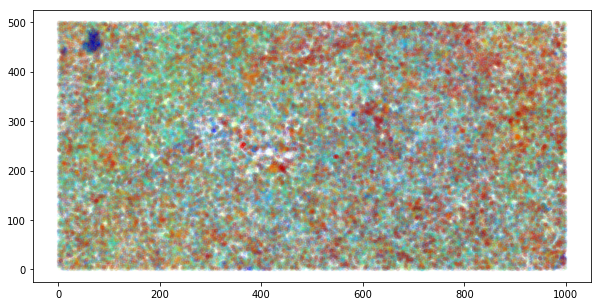

In [4]:
# plot of the species
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
species = labelencoder.fit_transform(data["sp"])
species = species / S
plt.figure(figsize=(10,5))
plt.scatter(data["gx"], data["gy"], c=species, cmap="jet", alpha=.05, marker=".")
plt.show()

In [5]:
# divide the data in 200 subplots
xdiv = [x for x in range(0, 1001, 50)]
ydiv = [x for x in range(0,  501, 50)]

subplot = []
df = pd.DataFrame()

for i in range(len(xdiv)-1):
    for j in range(len(ydiv)-1):
        df = data[data["gx"] >= xdiv[i]  ]
        df =   df[  df["gx"] <  xdiv[i+1]]
        df =   df[  df["gy"] >= ydiv[j]  ]
        df =   df[  df["gy"] <  ydiv[j+1]]
        subplot.append(df)


In [6]:
# the ij element indicates the abundance of species j in subplot i
# rows i    -> subplots
# columns j -> species
abundance_matrix = np.zeros((len(subplot), S))
for i, df in enumerate(subplot):
    for j, p in enumerate(Species):
        n = df[df["sp"] == p].shape[0]
        abundance_matrix[i,j] = n
print(abundance_matrix.shape)
abundance_matrix

(200, 299)


array([[ 0., 25.,  9., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  3.,  0., ...,  0.,  0.,  0.],
       [ 0.,  6.,  0., ...,  2.,  0.,  0.]])

In [7]:
"""average_abundance = matrix.mean(axis=0)
sigma = abuundance_matrix.std(axis=0)
for x,y,z in zip(Species, average_abundance, sigma):
    print(x, y, z)"""

'average_abundance = matrix.mean(axis=0)\nsigma = abuundance_matrix.std(axis=0)\nfor x,y,z in zip(Species, average_abundance, sigma):\n    print(x, y, z)'

In [8]:
presence_matrix = abundance_matrix > 0
average_presence = presence_matrix.mean(axis=0)
'''for x,y in zip(Species, average_presence):
    print(x, y)'''
print(average_presence)


[0.05  0.765 0.08  0.275 0.18  0.515 0.01  0.71  0.34  1.    0.04  0.115
 0.02  0.72  0.72  0.335 0.69  0.17  0.03  0.005 0.01  0.28  0.035 0.67
 0.5   0.215 0.025 0.01  0.07  0.86  0.005 0.945 0.025 0.825 0.985 0.77
 0.37  0.085 0.065 0.44  0.96  0.105 0.79  0.04  0.385 0.045 0.23  0.425
 0.005 0.22  0.03  0.29  0.01  0.565 0.91  0.44  0.08  0.04  0.01  0.43
 0.755 0.005 0.015 0.28  0.345 0.845 0.955 0.93  0.015 0.48  0.045 0.175
 0.265 0.93  0.02  0.305 1.    0.295 0.22  0.78  0.045 0.06  0.305 0.695
 0.405 0.85  0.99  0.855 0.98  1.    0.02  0.035 0.005 0.055 0.04  0.03
 0.015 0.105 0.025 0.035 1.    0.685 0.26  0.52  0.25  0.99  0.95  0.87
 0.245 0.69  0.775 0.3   0.005 0.33  0.785 0.315 0.915 0.865 0.09  1.
 0.33  1.    0.285 0.18  0.24  0.77  0.01  0.735 0.01  0.215 0.12  0.905
 0.025 0.73  0.59  0.095 0.33  0.96  0.62  0.985 0.38  0.095 0.595 0.02
 0.005 0.305 0.445 0.22  0.83  0.005 0.53  0.005 0.19  0.775 0.13  0.975
 0.02  0.01  0.27  0.575 0.76  0.01  0.05  0.155 0.045 0.4  

# Max Ent 1

$$\mathcal{H} = -\sum_{i=1}^S \lambda_i \sigma_i$$

$$ P(\sigma_i) = \frac{1}{Z}e^{\sum_{i=1}^S \lambda_i \sigma_i} $$

$$ Z = \sum_{\{\sigma\}}e^{-\sum_{i=1}^S \lambda_i \sigma_i}  $$

$$ \langle \sigma_i \rangle = m_i =-\frac{\partial \ln{Z}}{\partial \lambda_i} = - \tanh{\lambda_i} \Rightarrow \lambda_i = \tanh^{-1}(-m_i) $$

In [9]:
m = 2*average_presence-1
lambda_MaxEnt1 = np.arctanh(-m)
print(lambda_MaxEnt1)

[ 1.47221949 -0.59014516  1.22117352  0.48470028  0.75817374 -0.030009
  2.29755993 -0.44769202  0.33164711        -inf  1.58902692  1.02032776
  1.94591015 -0.4722308  -0.4722308   0.34282825 -0.40005965  0.79281363
  1.73804934  2.64665241  2.29755993  0.4722308   1.65839002 -0.35409253
 -0.          0.64752284  1.83178082  2.29755993  1.29334467 -0.90764498
  2.64665241 -1.42192587  1.83178082 -0.77529871 -2.09229572 -0.6041556
  0.26610841  1.1881364   1.33307963  0.12058103 -1.58902692  1.07143168
 -0.66246271  1.58902692  0.23418947  1.52752443  0.6041556   0.15114044
  2.64665241  0.63283319  1.73804934  0.44769202  2.29755993 -0.13073985
 -1.15681746  0.12058103  1.22117352  1.58902692  2.29755993  0.14092558
 -0.56272977  2.64665241  2.09229572  0.4722308   0.32054541 -0.84795576
 -1.52752443 -1.29334467  2.09229572  0.04002135  1.52752443  0.77529871
  0.51007034 -1.29334467  1.94591015  0.41180003        -inf  0.43561122
  0.63283319 -0.63283319  1.52752443  1.37576766  0.41

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in arctanh
  


In [10]:
# check if I get the same results if I use a Ising model like matrix
# (+1 -> presence, -1 -> absence), instead of doing the analisys
# and then appling the condotion: m = 2*average_presence-1
presence_matrix_Ising = presence_matrix.copy()
presence_matrix_Ising = presence_matrix_Ising.astype(int)
presence_matrix_Ising[presence_matrix_Ising == 0] = -1

average_presence_Ising = presence_matrix_Ising.mean(axis=0)

lambda_MaxEnt1_Ising = np.arctanh(-average_presence_Ising)
np.allclose(lambda_MaxEnt1_Ising, lambda_MaxEnt1)

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in arctanh
  # Remove the CWD from sys.path while we load stuff.


True

In [11]:
def H1(Lambda, configuration):
    sigma = configuration.mean(axis=0)
    return -np.dot(Lambda, sigma)
H1(lambda_MaxEnt1_Ising, presence_matrix_Ising)

inf

# Max Ent 2

$$\mathcal{H} = -\sum_{j=1}^S \lambda_j \sigma_j - \frac{k}{S}(\sum_{j=1}^S \sigma_j)^2$$

Constraints:

1. $(1-m_i)/2 = p_i \Rightarrow$ Ising-like presence matrix
2. $\langle(\sum_{j=1}^S \sigma_j)^2\rangle_{emp} = \langle(S_+ - S_-)^2\rangle_{emp}$

In [12]:
constr1_data = average_presence_Ising.copy()
constr2_data = (((presence_matrix_Ising > 0).sum(axis = 1) - (presence_matrix_Ising < 0).sum(axis = 1))**2).mean()
print(constr2_data)

6377.16


In [13]:
def H2(Lambda, k, configuration):
    #sigma = configuration.mean(axis=0)
    first_sum  = np.dot(Lambda,configuration)
    second_sum = (k/configuration.shape[0])*(np.sum(configuration))**2
    
    return(-first_sum - second_sum)

H2(lambda_MaxEnt1_Ising, 1, presence_matrix_Ising[1])

inf

In [14]:
np.random.seed(20190324)

def Metropolis(Lambda,k,n_steps=10000, beta=100, species=299, verbose=False):
    config = np.random.choice([-1,1], species)
    # list to save the configurations
    Configuration = [config]
    # list to save the energies
    Energy = [H2(Lambda, k, config)]
    for i in range(n_steps):
        # save initial configuration
        config_init = config.copy()
        # Calculate the energy of the initial configuration
        E_init = H2(Lambda, k, config_init)
        
        # change one element at random in the configuration
        config_final = config_init.copy()
        config_final[np.random.randint(0, species)] *= -1
        
        # Calculate the energy of the final configuration
        E_final = H2(Lambda, k, config_final)
                
        # if E_final < E_init always accept the new configuration
        # if E_final > E_init accept the new configuration with probability = exp[-beta(E_final-E_init)]
        threshold = np.exp(beta*(E_init-E_final)) #     threshold > 1 if E_final < E_init
                                                  # 0 < threshold < 1 if E_final > E_init
        # get random number in [0,1] and accept the configuration if it's lower than the threshold
        if np.random.rand() < threshold:
            config = config_final.copy()
            Configuration.append(config)
            Energy.append(E_final)
            if verbose: print("Accepted with prob", np.minimum(threshold, 1))
        else:
            config = config_init.copy()
            Configuration.append(config)
            Energy.append(E_init)
            if verbose: print("Rejected with prob", 1-threshold)
                
    return Configuration, Energy

Config: 10001
En: 10001


Text(0, 0.5, 'Energy')

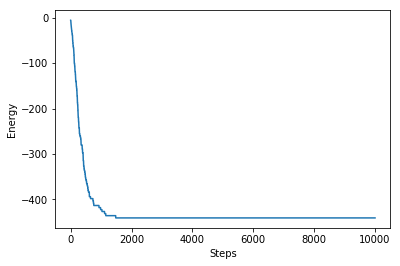

In [15]:
l = np.random.rand(len(lambda_MaxEnt1_Ising))
Config, En = Metropolis(l, 1, n_steps=10000, beta=100)
print("Config:", len(Config))
print("En:", len(En))
plt.plot(En)
plt.xlabel("Steps")
plt.ylabel("Energy")


In [16]:
Config[-1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
'''def ModelUpdate(data_config, model_config, Lambda, k, eta=1):
    data_constr1  = data_config.mean(axis=0)
    model_constr1 = data_config.mean(axis=0)
    new_Lambda  = Lambda + eta*(data_constr1 - model_constr1)
    data_constr2  = (((data_config  > 0).sum(axis = 1) - (data_config  < 0).sum(axis = 1))**2).mean()
    model_constr2 = (((model_config > 0).sum(axis = 1) - (model_config < 0).sum(axis = 1))**2).mean()
    new_k = k + eta*(data_constr2 - model_constr2)
    return new_Lambda, k'''

'def ModelUpdate(data_config, model_config, Lambda, k, eta=1):\n    data_constr1  = data_config.mean(axis=0)\n    model_constr1 = data_config.mean(axis=0)\n    new_Lambda  = Lambda + eta*(data_constr1 - model_constr1)\n    data_constr2  = (((data_config  > 0).sum(axis = 1) - (data_config  < 0).sum(axis = 1))**2).mean()\n    model_constr2 = (((model_config > 0).sum(axis = 1) - (model_config < 0).sum(axis = 1))**2).mean()\n    new_k = k + eta*(data_constr2 - model_constr2)\n    return new_Lambda, k'

In [18]:
def param_from_Metropolis(Configurations, discard_rate=.75):
    Config = np.array(Configurations) 
    Config = Config[int(discard_rate*Config.shape[0]):,:] # use only the last configurations
    #print(Config)
    constr1 = Config.mean(axis=0)
    constr2 = (((Config > 0).sum(axis = 1) - (Config < 0).sum(axis = 1))**2).mean()
    return constr1, constr2

In [19]:
param_from_Metropolis(Config)


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [20]:
Lambda = np.random.rand(len(lambda_MaxEnt1_Ising))
k = 1
n_iter = 100
eta = 10
Lambda_list = [Lambda]
k_list = [k]
for t in range(n_iter):
    # generate random configurations (Metropolis)
    Config, En = Metropolis(Lambda, k, n_steps=1000, beta=100)
    # get constraints from Metropolis configurations
    constr1_model, constr2_model = param_from_Metropolis(Config)
    # update parameters
    Lambda += eta*(constr1_data - constr1_model)
    k      += eta*(constr2_data - constr2_model)
    Lambda_list.append(Lambda)
    k_list.append(k)
    print("Iteration {:d}/{:d}".format(t+1, n_iter))
    

Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

In [21]:
for l in Lambda_list:
    print(l[5])

-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089251625
-22.19242089

In [22]:
Lambda_list[1]

array([-4.66828472e+02,  2.35315405e+00, -4.51990094e+02, -1.69201734e+02,
       -4.19045179e+02, -2.21924209e+01, -6.18699704e+02,  6.41903110e+00,
       -8.57248172e+01,  2.23867233e+02, -6.99265967e+02, -3.92542945e+02,
       -6.06178084e+02,  1.10094071e+00, -1.83821595e+01, -6.02691821e+01,
       -1.77481226e+01, -3.13956207e+02, -5.99983893e+02, -4.51094607e+02,
       -5.90692740e+02, -3.03753073e+01, -5.92872321e+02, -2.20766209e+01,
       -5.83203430e+01, -2.10771347e+02, -7.52381227e+02, -5.41003182e+02,
       -4.57393561e+02, -2.64115590e+00, -5.09908855e+02,  8.86035858e+01,
       -4.83357629e+02,  3.92968940e+00,  2.46123873e+02,  1.74303766e+01,
        1.10706951e+01, -4.89465645e+02, -6.78864810e+02, -7.67045773e+01,
        1.76838450e+02, -5.11009353e+02, -1.17904701e+01, -5.53740081e+02,
       -4.24465937e+01, -6.12338037e+02, -3.18799420e+02, -5.99073806e+01,
       -6.49809913e+02, -1.94183011e+02, -5.46215243e+02, -1.20013384e+02,
       -5.39920194e+02, -